This workbook will walkthrough the data preparation process and machine learning of the Titanic Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import xgboost as xgb
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from xgboost import plot_tree
from matplotlib import pyplot
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import pickle
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline
# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [2]:
#Reading datasets into python
data=pd.read_csv('C:/Users/a0019865/Desktop/Analytics Road Map/VAC Work Machine Learning/Presentations/Mongosuthu University/Datasets/Titanic/titanic-survival-master/titanic_data.csv') 

In [3]:
#train = pd.read_cs()
#test = pd.read_csv()
#test.insert(1, 'Survived', float('nan'))
#data = pd.concat([train, test])

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
print(data.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [8]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
PassengerId may be dropped from training dataset as it does not contribute to survival.
Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.

We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
We may want to engineer the Name feature to extract Title as a new feature.
We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
We may also want to create a Fare range feature if it helps our analysis.

In [10]:
data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


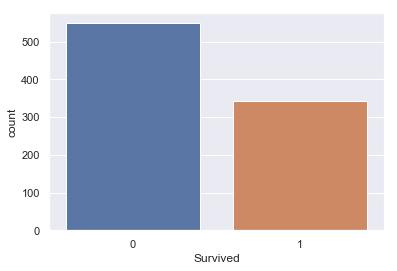

In [11]:
sns.countplot(x='Survived', data=data);

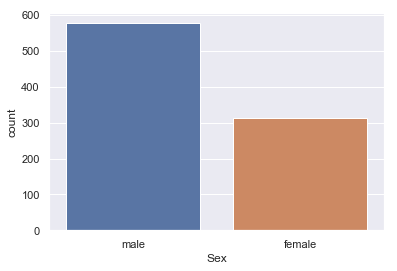

In [18]:
sns.countplot(x='Sex', data=data);

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


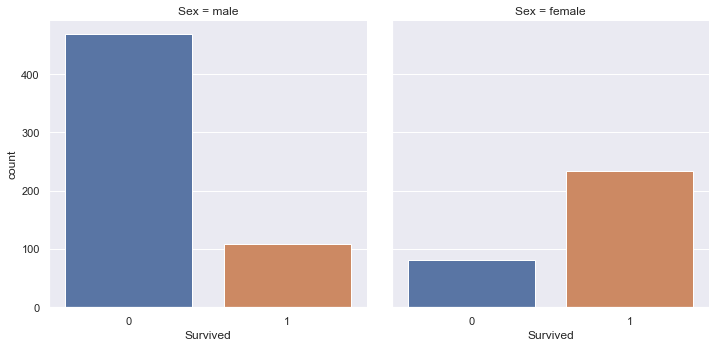

In [19]:
sns.factorplot(x='Survived', col='Sex', kind='count', data=data);

In [26]:
data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [33]:
data.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


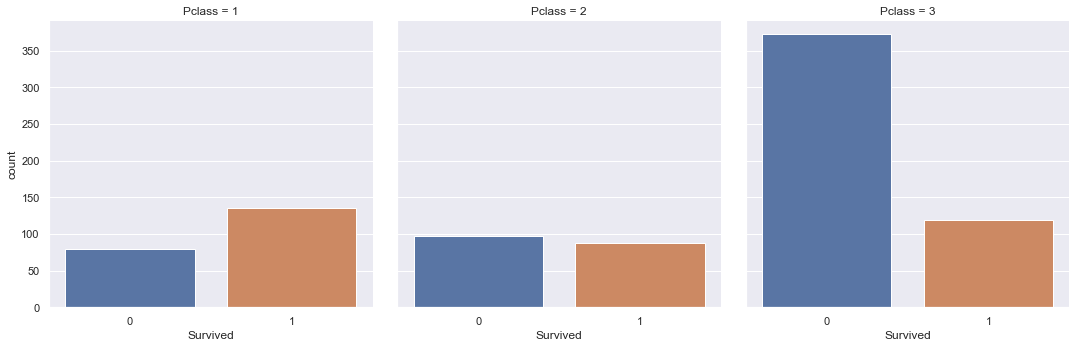

In [23]:
sns.factorplot(x='Survived', col='Pclass', kind='count', data=data);

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


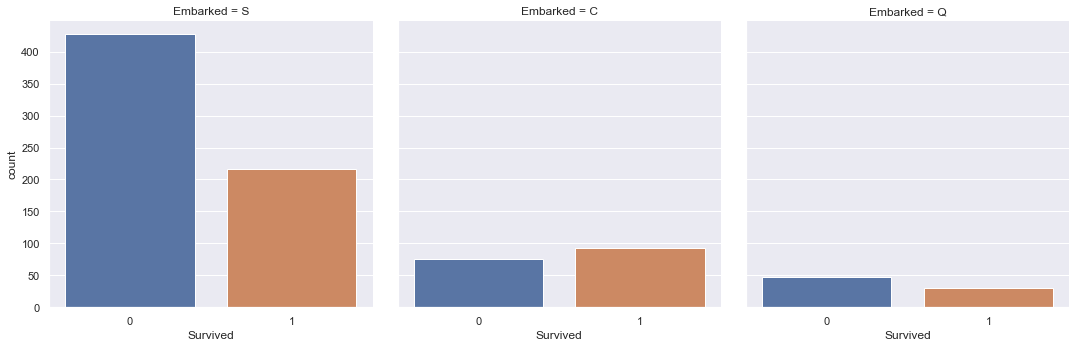

In [24]:
sns.factorplot(x='Survived', col='Embarked', kind='count', data=data);

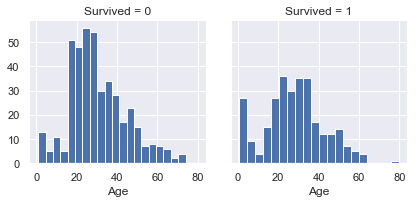

In [27]:
g = sns.FacetGrid(data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


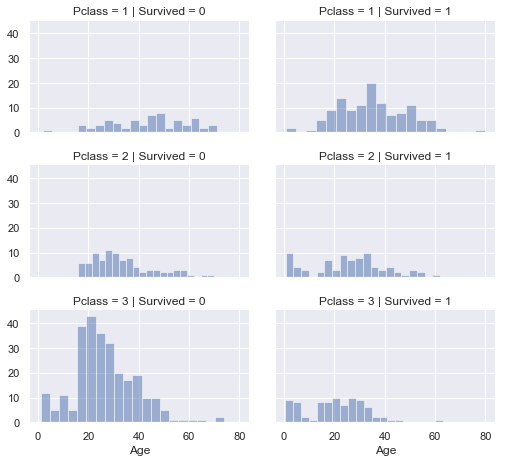

In [28]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [12]:
data2 = data.drop(['Ticket', 'Cabin'], axis=1)

In [13]:
data2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


#creating new features from existing
We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name and PassengerId features.

In [14]:
#create a column with categorical values
cat_columns = ["Sex"]

In [15]:
df=pd.get_dummies(data2,prefix='',prefix_sep='',columns=cat_columns)

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,S,0,1


In [17]:
#Imputing missing values
# Age
MedianAge = df.Age.median()
df.Age = df.Age.fillna(value=MedianAge)
# Embarked replace NaN with the mode value
ModeEmbarked = df.Embarked.mode()[0]
df.Embarked = df.Embarked.fillna(value=ModeEmbarked)
# Fare have 1 NaN missing value on the Submission dataset
MedianFare = df.Fare.median()
df.Fare = df.Fare.fillna(value=MedianFare)


In [53]:
#from sklearn.preprocessing import StandardScaler
#scale = StandardScaler().fit(df[['Age', 'Fare']])
#df[['Age', 'Fare']] = scale.transform(df[['Age', 'Fare']])

In [18]:
x=df[['Pclass','Age','female','male','Parch','Fare','SibSp']]
y=df['Survived']

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,S,0,1


In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [21]:
scaler = StandardScaler()

In [22]:
scaler.fit(x_train)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [24]:
mlp = MLPClassifier(hidden_layer_sizes=(9,1,9))

In [25]:
mlp.fit(x_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(9, 1, 9), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [26]:
predictions = mlp.predict(x_test)

In [27]:
print(confusion_matrix(y_test,predictions))

[[96 14]
 [22 47]]


In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.77      0.68      0.72        69

   micro avg       0.80      0.80      0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



In [29]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler().fit(df[['Age', 'Fare']])
df[['Age', 'Fare']] = scale.transform(df[['Age', 'Fare']])

In [30]:
data_dmatrix = xgb.DMatrix(data=x,label=y)

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [32]:
# fit model no training data
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [33]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [34]:
# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

In [49]:
# evaluate predictions
#accuracy = accuracy_score(y_test, predictions)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [42]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep the predictions for class 1 only
#probs = probs[:, 1]
print(probs*100)

[[28.970396  71.0296   ]
 [93.41354    6.586459 ]
 [52.098537  47.901463 ]
 [76.280685  23.719313 ]
 [82.02485   17.975153 ]
 [94.19816    5.8018417]
 [15.0245075 84.975494 ]
 [ 4.206884  95.79311  ]
 [52.425026  47.574978 ]
 [31.568056  68.431946 ]
 [72.57482   27.425184 ]
 [35.720818  64.27918  ]
 [ 2.6589334 97.341064 ]
 [84.16717   15.832827 ]
 [ 2.2128522 97.78715  ]
 [32.06249   67.93751  ]
 [ 7.170105  92.829895 ]
 [60.705387  39.294617 ]
 [86.256966  13.743031 ]
 [83.40126   16.598736 ]
 [38.658905  61.341095 ]
 [ 3.601247  96.39875  ]
 [90.80956    9.190442 ]
 [88.424355  11.575647 ]
 [93.355446   6.644555 ]
 [85.514854  14.485142 ]
 [85.53693   14.463073 ]
 [ 2.9282033 97.0718   ]
 [82.10833   17.891672 ]
 [87.237785  12.762211 ]
 [88.292755  11.707249 ]
 [ 5.4152193 94.58478  ]
 [81.25975   18.74025  ]
 [77.122696  22.877304 ]
 [82.52257   17.47743  ]
 [24.07688   75.92312  ]
 [95.23771    4.762294 ]
 [89.64572   10.354279 ]
 [15.670734  84.32926  ]
 [68.83941   31.16059  ]


In [43]:
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

AUC: 0.889


In [36]:
# feature importance
print(model.feature_importances_)

[0.08006814 0.36967632 0.08858603 0.         0.00681431 0.36967632
 0.08517887]


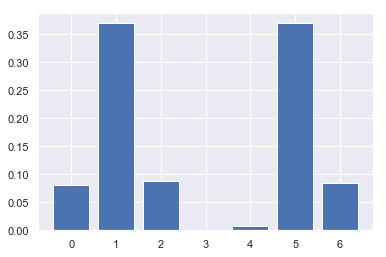

In [37]:
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

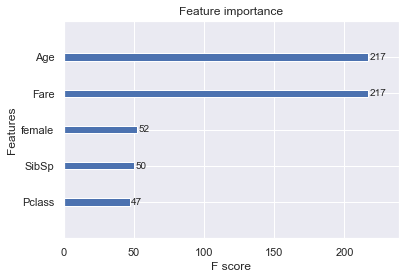

In [38]:
# plot feature importance
plot_importance(model,max_num_features=5)
pyplot.show()

In [44]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.calibration import calibration_curve
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc,roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [45]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

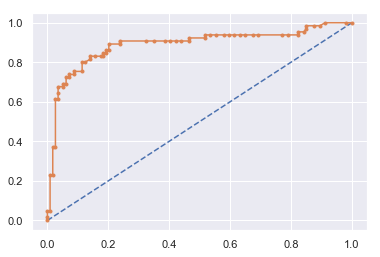

In [46]:
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [47]:
# reliability diagram
fop, mpv = calibration_curve(y_test, probs, n_bins=10)

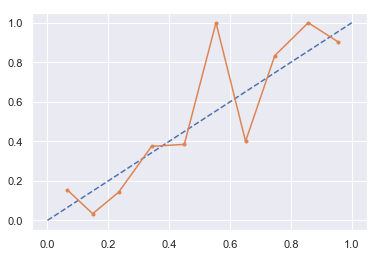

In [48]:
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot model reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()